In [1]:
import pandas as pd
import numpy as np

data_original = pd.read_csv("data_original.csv")
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   n_atoms              4650 non-null   int64
 1   fcc_bulk             4650 non-null   int64
 2   hcp_bulk             4650 non-null   int64
 3   five_fold_axis       4650 non-null   int64
 4   ico_center           4650 non-null   int64
 5   deca_notch           4650 non-null   int64
 6   fcc_111              4650 non-null   int64
 7   fcc_100              4650 non-null   int64
 8   five_fold_surf_edge  4650 non-null   int64
 9   fcc_10_edge          4650 non-null   int64
 10  fcc_11_edge          4650 non-null   int64
 11  deca_notch_vertex    4650 non-null   int64
 12  ico_surf_vertex      4650 non-null   int64
 13  tetra_edge           4650 non-null   int64
 14  trun_oct_vertex      4650 non-null   int64
 15  cubo_corner          4650 non-null   int64
 16  n_atoms_unk          465

# Data Cleaning

In [2]:
data_original.drop(["five_fold_axis", "n_atoms_unk", "bulk_atoms"], axis = 1, inplace=True)

In [3]:
# # Create dummy variables
# dummy_list = pd.get_dummies(data_original["ico_center"], prefix = "n_ico_center")
# data_cleaned = pd.concat([data_original, dummy_list], axis = 1)
# data_cleaned.drop(["ico_center"], axis = 1, inplace=True)
# data_cleaned.isnull().sum()
data_cleaned = data_original.drop(["ico_center"], axis = 1)

In [4]:
data_cleaned.head()

,n_atoms,fcc_bulk,hcp_bulk,deca_notch,fcc_111,fcc_100,five_fold_surf_edge,fcc_10_edge,fcc_11_edge,deca_notch_vertex,ico_surf_vertex,tetra_edge,trun_oct_vertex,cubo_corner,surface_atoms,type
0,171,5,16,0,17,1,22,4,1,7,3,0,9,0,150,3
1,171,26,34,3,20,11,14,17,0,10,1,0,13,1,111,0
2,171,27,32,5,22,9,18,18,0,6,2,0,16,0,112,0
3,171,0,0,3,0,0,5,0,0,9,9,0,4,0,171,3
4,171,2,34,0,17,0,31,2,0,17,5,0,6,0,135,1


## Visualize the Correlations between Features

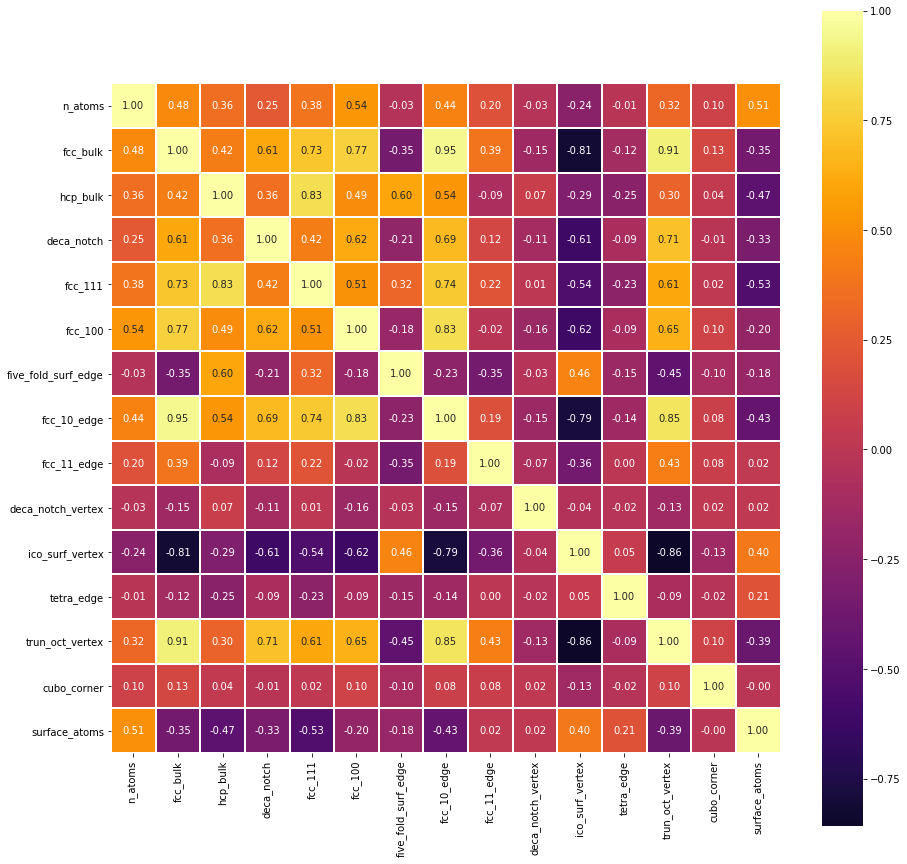

In [5]:
# Visualize the correlation in a matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corr_data = data_cleaned.drop("type", axis=1).corr()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(corr_data, vmax = 1.0, cmap = "inferno", center=0, fmt=".2f", linewidths = 1, square = True, annot = True)
plt.savefig("./figs/heatmap_corr.png", dpi = 300)
plt.savefig('./figs/time_trend.png', dpi = 300, bbox_inches='tight')

plt.show()

## Selections of Features

In [6]:
features = data_cleaned.columns.to_list()
features.remove("type")
#features.remove("n_atoms")
# features.remove("surface_atoms")
# features.remove("hcp_bulk")
print(features)

['n_atoms', 'fcc_bulk', 'hcp_bulk', 'deca_notch', 'fcc_111', 'fcc_100', 'five_fold_surf_edge', 'fcc_10_edge', 'fcc_11_edge', 'deca_notch_vertex', 'ico_surf_vertex', 'tetra_edge', 'trun_oct_vertex', 'cubo_corner', 'surface_atoms']


In [7]:
# # Over-Sampling using SMOTE
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# over_samp = SMOTE(random_state = 2)

# train_x, test_x, train_y, test_y = train_test_split(data_cleaned[features], data_cleaned["type"], train_size = 0.7, random_state = 2)

# train_x_os, train_y_os = over_samp.fit_sample(train_x, train_y)
# train_x_os = pd.DataFrame(train_x_os, columns = features)
# train_y_os = pd.DataFrame(train_x_os, columns = ["type"])

## Split into Train and Test Sets

In [8]:
from sklearn.model_selection import train_test_split


train_x, test_x, train_y, test_y = train_test_split(data_cleaned[features], data_cleaned["type"], train_size = 0.7, random_state = 2)

# print(train_x.shape, test_x.shape)

## Recursive Feature Elimination

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter = 5000)
rfe = RFE(lr, n_features_to_select = 10)

rfe_results = rfe.fit(train_x, train_y)
print(rfe_results.support_)
print(features)

[False  True  True  True  True  True  True False  True False  True  True
 False  True False]
['n_atoms', 'fcc_bulk', 'hcp_bulk', 'deca_notch', 'fcc_111', 'fcc_100', 'five_fold_surf_edge', 'fcc_10_edge', 'fcc_11_edge', 'deca_notch_vertex', 'ico_surf_vertex', 'tetra_edge', 'trun_oct_vertex', 'cubo_corner', 'surface_atoms']


In [10]:
features_rfe = features.copy()
features_rfe.remove("n_atoms")
features_rfe.remove("fcc_10_edge")
features_rfe.remove("deca_notch_vertex")
features_rfe.remove("trun_oct_vertex")
features_rfe.remove("surface_atoms")
print(features_rfe)

['fcc_bulk', 'hcp_bulk', 'deca_notch', 'fcc_111', 'fcc_100', 'five_fold_surf_edge', 'fcc_11_edge', 'ico_surf_vertex', 'tetra_edge', 'cubo_corner']


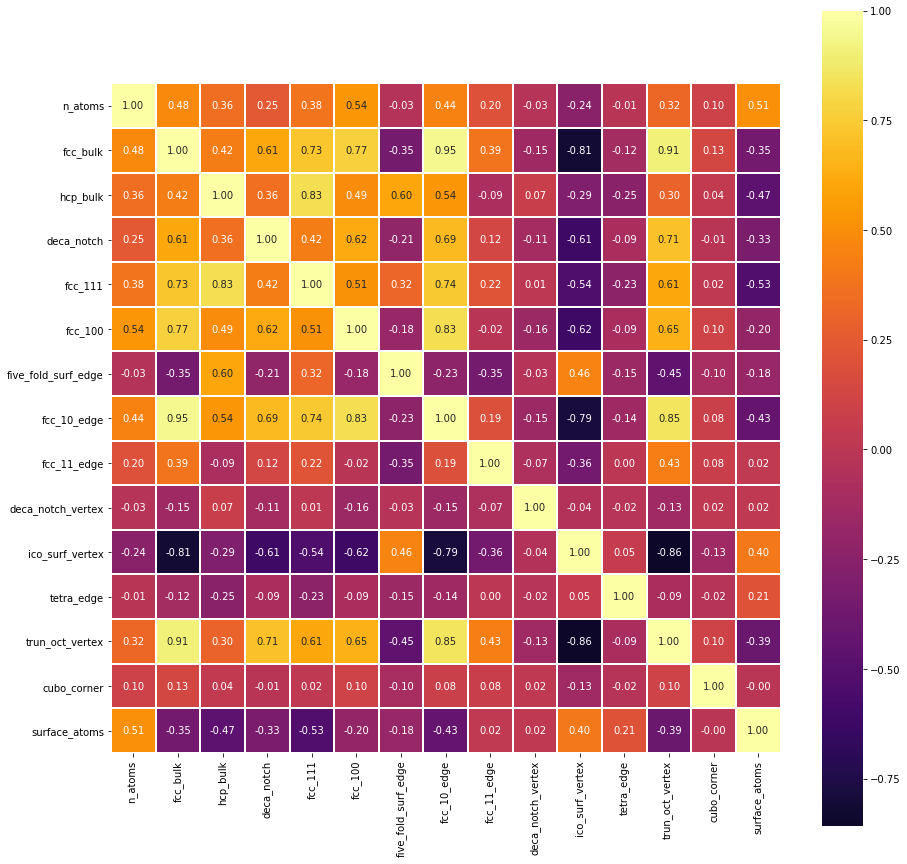

In [11]:
# Correlation after rfe
corr_data_rfe = data_cleaned[features_rfe].corr()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(corr_data, vmax = 1.0, cmap = "inferno", center=0, fmt=".2f", linewidths = 1, square = True, annot = True)
plt.savefig("./figs/heatmap_corr_rfe.png", dpi = 300)

plt.show()

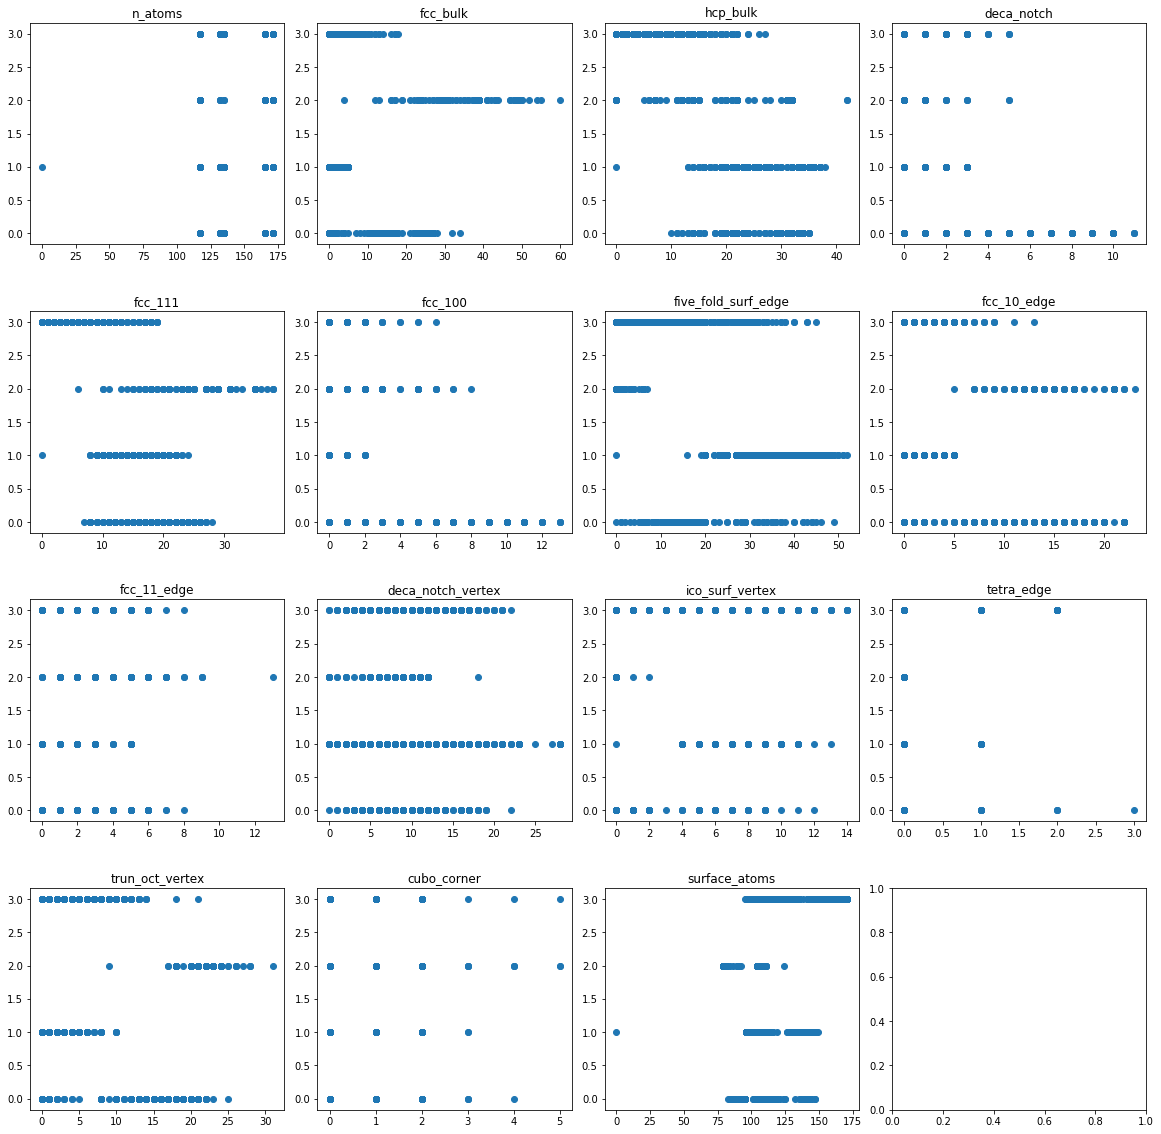

In [12]:
# Visualize the correlations between selected features and the target
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace= .13)
i = 0
a = int(len(features_rfe))

axs = axs.ravel()

for feature in features:
    axs[i].scatter(data_cleaned[feature], data_cleaned["type"])
    axs[i].set_title(feature)
    i = i+1
    
plt.savefig("./figs/corr_with_target.png", dpi = 300)

plt.show()

# Multivariate Linear Regression Using PCA

## Test: n = 2

In [13]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

train_x_rfe = train_x[features_rfe]
test_x_rfe = test_x[features_rfe]

train_x_rfe_norm = norm.fit_transform(train_x_rfe)
test_x_rfe_norm = norm.transform(test_x_rfe)

# Use PCA to transform the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Try both multinomial and one-over-rest methods
mul_lr = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter = 5000)

ovr_lr = LogisticRegression(multi_class="ovr", solver="newton-cg", max_iter = 5000)

# Data transformation
train_x_pca = pca.fit_transform(train_x_rfe_norm)
test_x_pca = pca.transform(test_x_rfe_norm)

ovr_lr.fit(train_x_pca, train_y)
mul_lr.fit(train_x_pca, train_y)

pred_train_ovr = ovr_lr.predict(train_x_pca)
pred_test_ovr = ovr_lr.predict(test_x_pca)

pred_train_mul = mul_lr.predict(train_x_pca)
pred_test_mul = mul_lr.predict(test_x_pca)

print(accuracy_score(test_y, pred_test_ovr))
print(accuracy_score(train_y, pred_train_ovr))

print(accuracy_score(test_y, pred_test_mul))
print(accuracy_score(train_y, pred_train_mul))

0.9455197132616487
0.9379416282642089
0.96415770609319
0.9526881720430107


##  Visualization of Results
### PCA Results

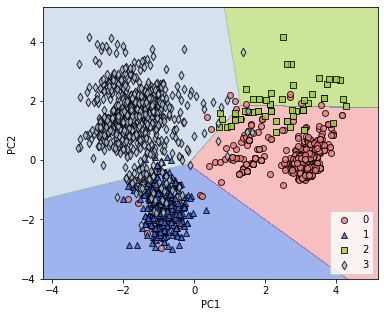

In [14]:
# Visualize the results of the multinomial method
from matplotlib.colors import ListedColormap

markers = ("o", "^", "s", "d")
colors = ("lightcoral", "royalblue", "yellowgreen", "lightsteelblue")
cmap = ListedColormap(colors[:len(np.unique(train_y))])

from pylab import rcParams
rcParams["figure.figsize"] = 6, 5

# Plot decision regions
pc1_min, pc1_max = train_x_pca[:, 0].min() - 1, train_x_pca[:, 0].max() + 1
pc2_min, pc2_max = train_x_pca[:, 1].min() - 1, train_x_pca[:, 1].max() + 1

pc1, pc2 = np.meshgrid(np.arange(pc1_min, pc1_max, 0.01), np.arange(pc1_min, pc2_max, 0.01))

Z = ovr_lr.predict(np.array([pc1.ravel(), pc2.ravel()]).T)
Z = Z.reshape(pc1.shape)

plt.contourf(pc1, pc2, Z, alpha = 0.5, cmap = cmap)
plt.xlim(pc1_min, pc2_max)
plt.ylim(pc2_min, pc2_max)

# Plot sample data points
for index, cat in enumerate(np.unique(train_y)):
    plt.scatter(train_x_pca[train_y == cat, 0], train_x_pca[train_y == cat, 1], alpha = 0.8, c = [cmap(index)], edgecolor = 'k',
                marker = markers[index], label = cat)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower right')
plt.savefig("./figs/LogisticRegression_PCA_result.png", dpi = 300)

plt.show()

### Check Contributions from Features

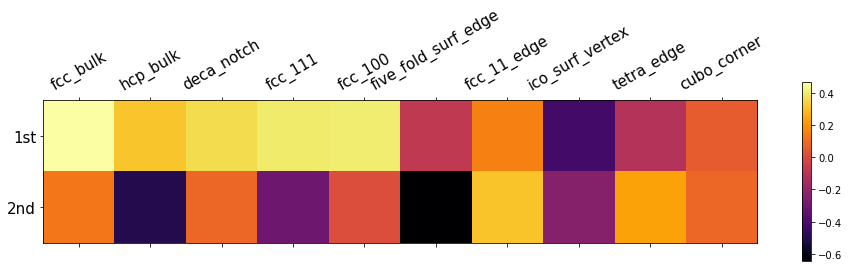

In [15]:
plt.matshow(pca.components_,cmap = "inferno")
plt.yticks(range(2),["1st", "2nd"],fontsize = 15)
plt.colorbar()
plt.xticks(range(len(features_rfe)), features_rfe, rotation = 30, ha = "center", fontsize = 15)
plt.savefig("./figs/pca_2_features.png", dpi = 300, bbox_inches = "tight")

plt.show()

### Confusion Matrix

Confusion matrix without normalization
[[421  13   1   4]
 [  0 447   0   5]
 [ 38   0  34   2]
 [  0  13   0 417]]


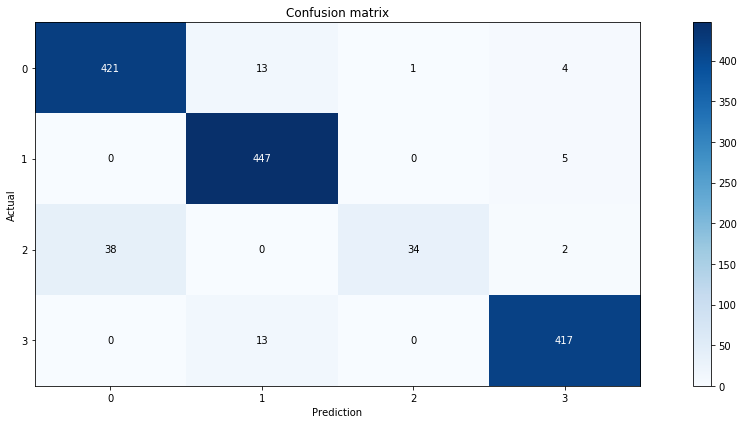

Normalized confusion matrix
[[0.95899772 0.02961276 0.0022779  0.00911162]
 [0.         0.98893805 0.         0.01106195]
 [0.51351351 0.         0.45945946 0.02702703]
 [0.         0.03023256 0.         0.96976744]]


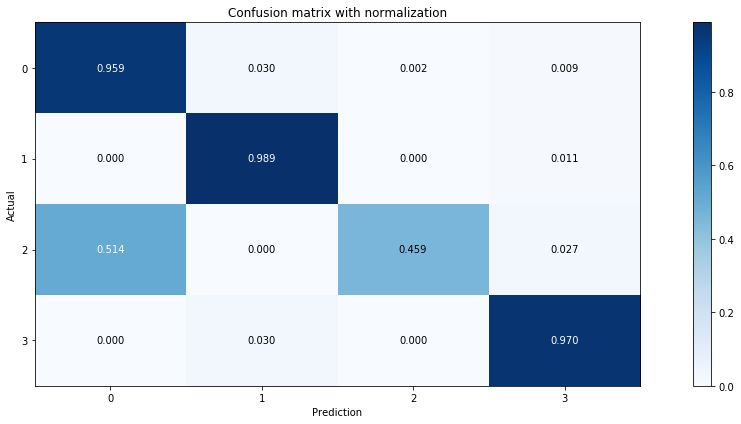

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_cm(actual, prediction, labels, normalize = False, title = None, cmap = plt.cm.Blues):
    if not title:
        if normalize:
            title = "Confusion matrix with normalization"
        else:
            title = "Confusion matrix"

    cm = confusion_matrix(actual, prediction)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (15, 6))
    im = ax.imshow(cm, interpolation = "nearest", cmap = cmap, aspect = 0.6)
    ax.figure.colorbar(im, ax = ax)

    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = labels, 
           yticklabels = labels,
           title = title,
           ylabel = "Actual",
           xlabel = "Prediction")

    plt.setp(ax.get_xticklabels(), rotation = 0, ha = "center", rotation_mode = "anchor")

    fmt = ".3f" if normalize else "d"
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = "center", va = "center",
                    color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_cm(test_y, pred_test_ovr, labels = ["0", "1", "2", "3"], normalize = False)
plt.savefig("./figs/cm_pca_unnorm.png", dpi = 300)

plt.show()

plot_cm(test_y, pred_test_ovr, labels = ["0", "1", "2", "3"], normalize = True)
plt.savefig("./figs/cm_pca_norm.png", dpi = 300)
plt.show()

### Variance Explained

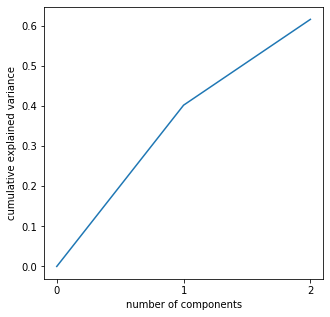

In [17]:
from pylab import rcParams
rcParams["figure.figsize"] = 5, 5
plot_results = np.insert(pca.explained_variance_ratio_, 0, 0)
plt.plot(np.cumsum(plot_results))
plt.xticks([0, 1, 2])
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
plt.savefig("./figs/pca_2_variance.png", dpi = 300)

plt.show()

## Test: n = all

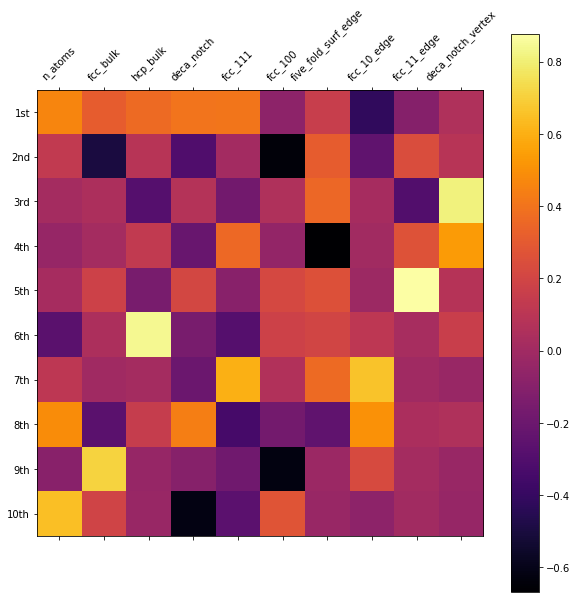

0.9842293906810036
0.9809523809523809


In [18]:
pca_all = PCA()

train_x_pca_all = pca_all.fit_transform(train_x_rfe_norm)
test_x_pca_all = pca_all.transform(test_x_rfe_norm)


from pylab import rcParams
rcParams["figure.figsize"] = 10, 10

plt.matshow(pca_all.components_, cmap = "inferno")
plt.yticks(range(len(pca_all.components_)), ["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(features_rfe)), features, rotation = 45, ha = "center", fontsize = 10)
plt.savefig("./figs/pca_all_features.png", dpi = 300)

plt.show()

mul_all_lr = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter = 5000)

mul_all_lr.fit(train_x_pca_all, train_y)

pred_train_mul_all = mul_all_lr.predict(train_x_pca_all)
pred_test_mul_all = mul_all_lr.predict(test_x_pca_all)

print(accuracy_score(test_y, pred_test_mul_all))
print(accuracy_score(train_y, pred_train_mul_all))

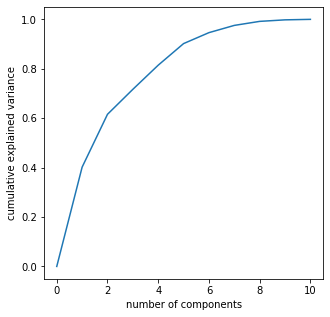

In [19]:
from pylab import rcParams
rcParams["figure.figsize"] = 5, 5
plot_results = np.insert(pca_all.explained_variance_ratio_, 0, 0)
plt.plot(np.cumsum(plot_results))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
plt.savefig("./figs/pca_all_variance.png", dpi = 300)

plt.show()

In [20]:
# # Logistic regression directly w/o PCA
# mul_lr_direct = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter = 5000)
# mul_lr_direct.fit(train_x_rfe, train_y)
# prediction_direct_train = mul_lr_direct.predict(train_x_rfe)
# prediction_direct_test = mul_lr_direct.predict(test_x_rfe)

# print(accuracy_score(test_y, prediction_direct_test))
# print(accuracy_score(train_y, prediction_direct_train))

## Results

In [21]:
# Calculate the accuracies
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuracy of logistic regression classifier using PCA (n=2) on the test set is {:.5f}'.format(accuracy_score(test_y, pred_test_mul)))
print('Accuracy of logistic regression classifier using PCA (n=2) on the train set is {:.5f}'.format(accuracy_score(train_y, pred_train_mul)), "\n")

print(confusion_matrix(test_y, pred_test_mul), "\n")

print(classification_report(test_y, pred_test_mul))

Accuracy of logistic regression classifier using PCA (n=2) on the test set is 0.96416
Accuracy of logistic regression classifier using PCA (n=2) on the train set is 0.95269 

[[418  13   4   4]
 [  0 447   0   5]
 [ 11   0  63   0]
 [  0  13   0 417]] 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       439
           1       0.95      0.99      0.97       452
           2       0.94      0.85      0.89        74
           3       0.98      0.97      0.97       430

    accuracy                           0.96      1395
   macro avg       0.96      0.94      0.95      1395
weighted avg       0.96      0.96      0.96      1395



### ROC Curve

In [22]:
# Calculate the ROC for the multi-class case

from sklearn import svm, datasets
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

from itertools import cycle

# One-vs-rest method applied
X = data_cleaned[features_rfe]
Y = label_binarize(data_cleaned["type"], classes=[0, 1, 2, 3])

train_x_rfe_bin, test_x_rfe_bin, train_y_bin, test_y_bin = train_test_split(X, Y, train_size = 0.7, random_state = 2)

train_x_rfe_bin = norm.fit_transform(train_x_rfe_bin)
test_x_rfe_bin = norm.transform(test_x_rfe_bin)

ovr_lr_bin = OneVsRestClassifier(svm.SVC(kernel = "linear", probability = True, random_state = 5))
ovr_lr_bin.fit(train_x_rfe, train_y_bin)

pred_test_ovr_bin = ovr_lr_bin.decision_function(test_x_rfe)

# Calculate the ROC curves and micro/macro ROC curves
roc_auc_score = {}
FPR = {}
TPR = {}

for i in range(train_y_bin.shape[1]):
    x, y, _ = roc_curve(test_y_bin[:, i], pred_test_ovr_bin[:, i])
    roc_auc_score[i] = auc(x, y)
    FPR[i] = x
    TPR[i] = y
   
FPR["micro"], TPR["micro"], _ = roc_curve(test_y_bin.ravel(), pred_test_ovr_bin.ravel())
roc_auc_score["micro"] = auc(FPR["micro"], TPR["micro"])

FPR_sum = np.unique(np.concatenate([FPR[i] for i in range(train_y_bin.shape[1])]))

TPR_mean = np.zeros_like(FPR_sum)
for i in range(train_y_bin.shape[1]):
    TPR_mean += interp(FPR_sum, FPR[i], TPR[i])
TPR_mean /= train_y_bin.shape[1]

FPR["macro"] = FPR_sum
TPR["macro"] = TPR_mean
roc_auc_score["macro"] = auc(FPR["macro"], TPR["macro"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


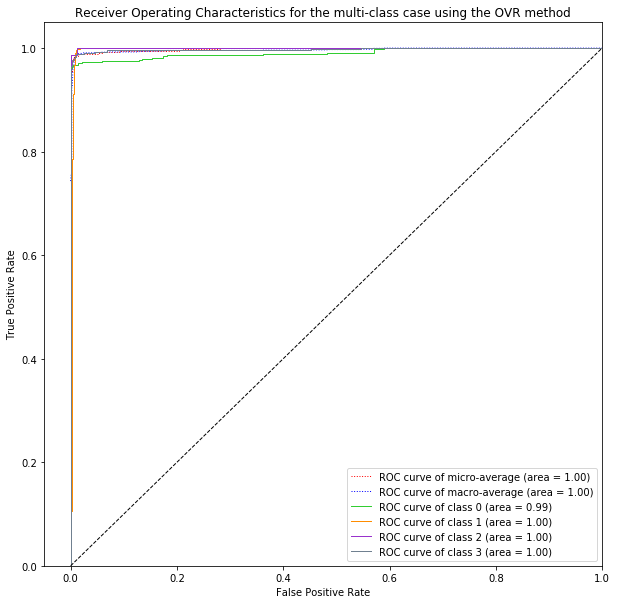

In [23]:
# Visualize all ROC curves

from pylab import rcParams
rcParams["figure.figsize"] = 10, 10

plt.plot(FPR["micro"], TPR["micro"],
         label = "ROC curve of micro-average (area = {0:0.2f})".format(roc_auc_score["micro"]),
         c = "r", ls = ":", lw = 1)

plt.plot(FPR["macro"], TPR["macro"],
         label = "ROC curve of macro-average (area = {0:0.2f})".format(roc_auc_score["macro"]),
         c = "b", ls = ":", lw=1)

colors = cycle(["limegreen", "darkorange", "darkorchid", "slategrey"])
for i, color in zip(range(train_y_bin.shape[1]), colors):
    plt.plot(FPR[i], TPR[i],
             label = "ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc_score[i]),
             c = color, ls = "-", lw = 1,)

plt.plot([0, 1], [0, 1],c = "k", ls = "--", lw = 1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristics for the multi-class case using the OVR method")
plt.legend(loc = "lower right")
plt.savefig("./figs/ROC_of_OVR.png", dpi = 300)

plt.show()

# Multivariate Random Forest

## Apply the Random Forest Method

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=20, criterion = "entropy", max_depth = 9, min_samples_split = 5, min_samples_leaf = 5, 
                            max_features = 10, bootstrap=True, random_state=3)

rf.fit(train_x, train_y)

pred_test_rf = rf.predict(test_x)
pred_train_rf = rf.predict(train_x)

print(accuracy_score(test_y, pred_test_rf))
print(accuracy_score(train_y, pred_train_rf))

0.9863799283154122
0.9920122887864823


## Plot the Validation Curve for Number of Trees and Features

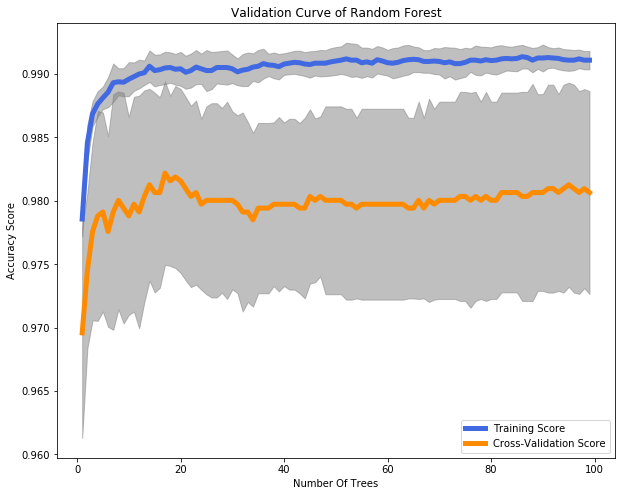

In [25]:
from sklearn.model_selection import validation_curve

val_range = np.arange(1, 100, 1)

train_rf_scores, test_rf_scores = validation_curve(RandomForestClassifier(criterion = "entropy", max_depth = 10,
                                                                    min_samples_split = 5, min_samples_leaf = 5,
                                                                    max_features = 10, bootstrap = True, random_state=3), 
                                             train_x, train_y, 
                                             param_name = "n_estimators", 
                                             param_range = val_range,
                                             cv = 10, 
                                             scoring = "accuracy", 
                                             n_jobs = -1)

train_rf_mean = np.mean(train_rf_scores, axis = 1)
test_rf_mean = np.mean(test_rf_scores, axis = 1)

train_rf_std = np.std(train_rf_scores, axis=1)
test_rf_std = np.std(test_rf_scores, axis=1)

from pylab import rcParams
rcParams["figure.figsize"] = 10, 8

plt.plot(val_range, train_rf_mean, label = "Training Score", color = "royalblue", lw = 5)
plt.plot(val_range, test_rf_mean, label = "Cross-Validation Score", color = "darkorange", lw = 5)

# Plot accurancy bands for training and test sets
plt.fill_between(val_range, train_rf_mean - train_rf_std, train_rf_mean + train_rf_std, color = "gray", alpha = 0.5)
plt.fill_between(val_range, test_rf_mean - test_rf_std, test_rf_mean + test_rf_std, color = "gray", alpha = 0.5)

# Create plot
plt.title("Validation Curve of Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.legend(loc = "lower right")
plt.savefig("./figs/val_cur_rf_trees.png", dpi = 300)

plt.show()

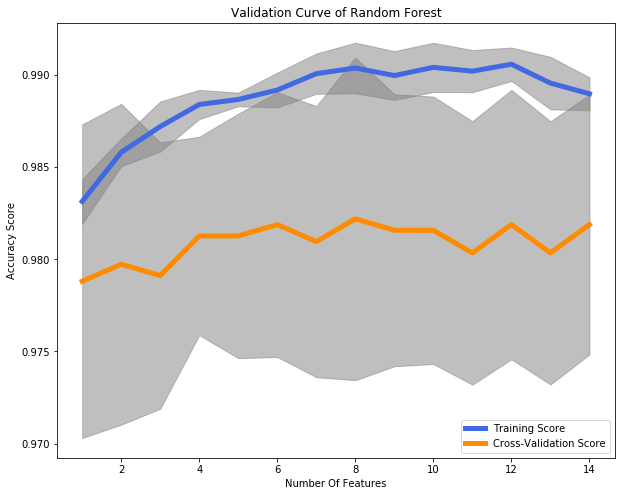

In [26]:
val_range = np.arange(1, 15, 1)

train_rf_scores, test_rf_scores = validation_curve(RandomForestClassifier(n_estimators = 20, criterion = "entropy",
                                                                          max_depth = 10, min_samples_split = 5,
                                                                          min_samples_leaf = 5, bootstrap = True,random_state=3), 
                                                   train_x, train_y, 
                                                   param_name = "max_features", 
                                                   param_range = val_range,
                                                   cv = 10, 
                                                   scoring = "accuracy",
                                                   n_jobs = -1)

train_rf_mean = np.mean(train_rf_scores, axis = 1)
test_rf_mean = np.mean(test_rf_scores, axis = 1)

train_rf_std = np.std(train_rf_scores, axis=1)
test_rf_std = np.std(test_rf_scores, axis=1)

from pylab import rcParams
rcParams["figure.figsize"] = 10, 8

plt.plot(val_range, train_rf_mean, label = "Training Score", color = "royalblue", lw = 5)
plt.plot(val_range, test_rf_mean, label = "Cross-Validation Score", color = "darkorange", lw = 5)

# Plot accurancy bands for training and test sets
plt.fill_between(val_range, train_rf_mean - train_rf_std, train_rf_mean + train_rf_std, color = "gray", alpha = 0.5)
plt.fill_between(val_range, test_rf_mean - test_rf_std, test_rf_mean + test_rf_std, color = "gray", alpha = 0.5)

# Create plot
plt.title("Validation Curve of Random Forest")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy Score")
plt.legend(loc = "lower right")
plt.savefig("./figs/val_cur_rf_features.png", dpi = 300)

plt.show()

## Visualization of the Results
### Tree Visualization

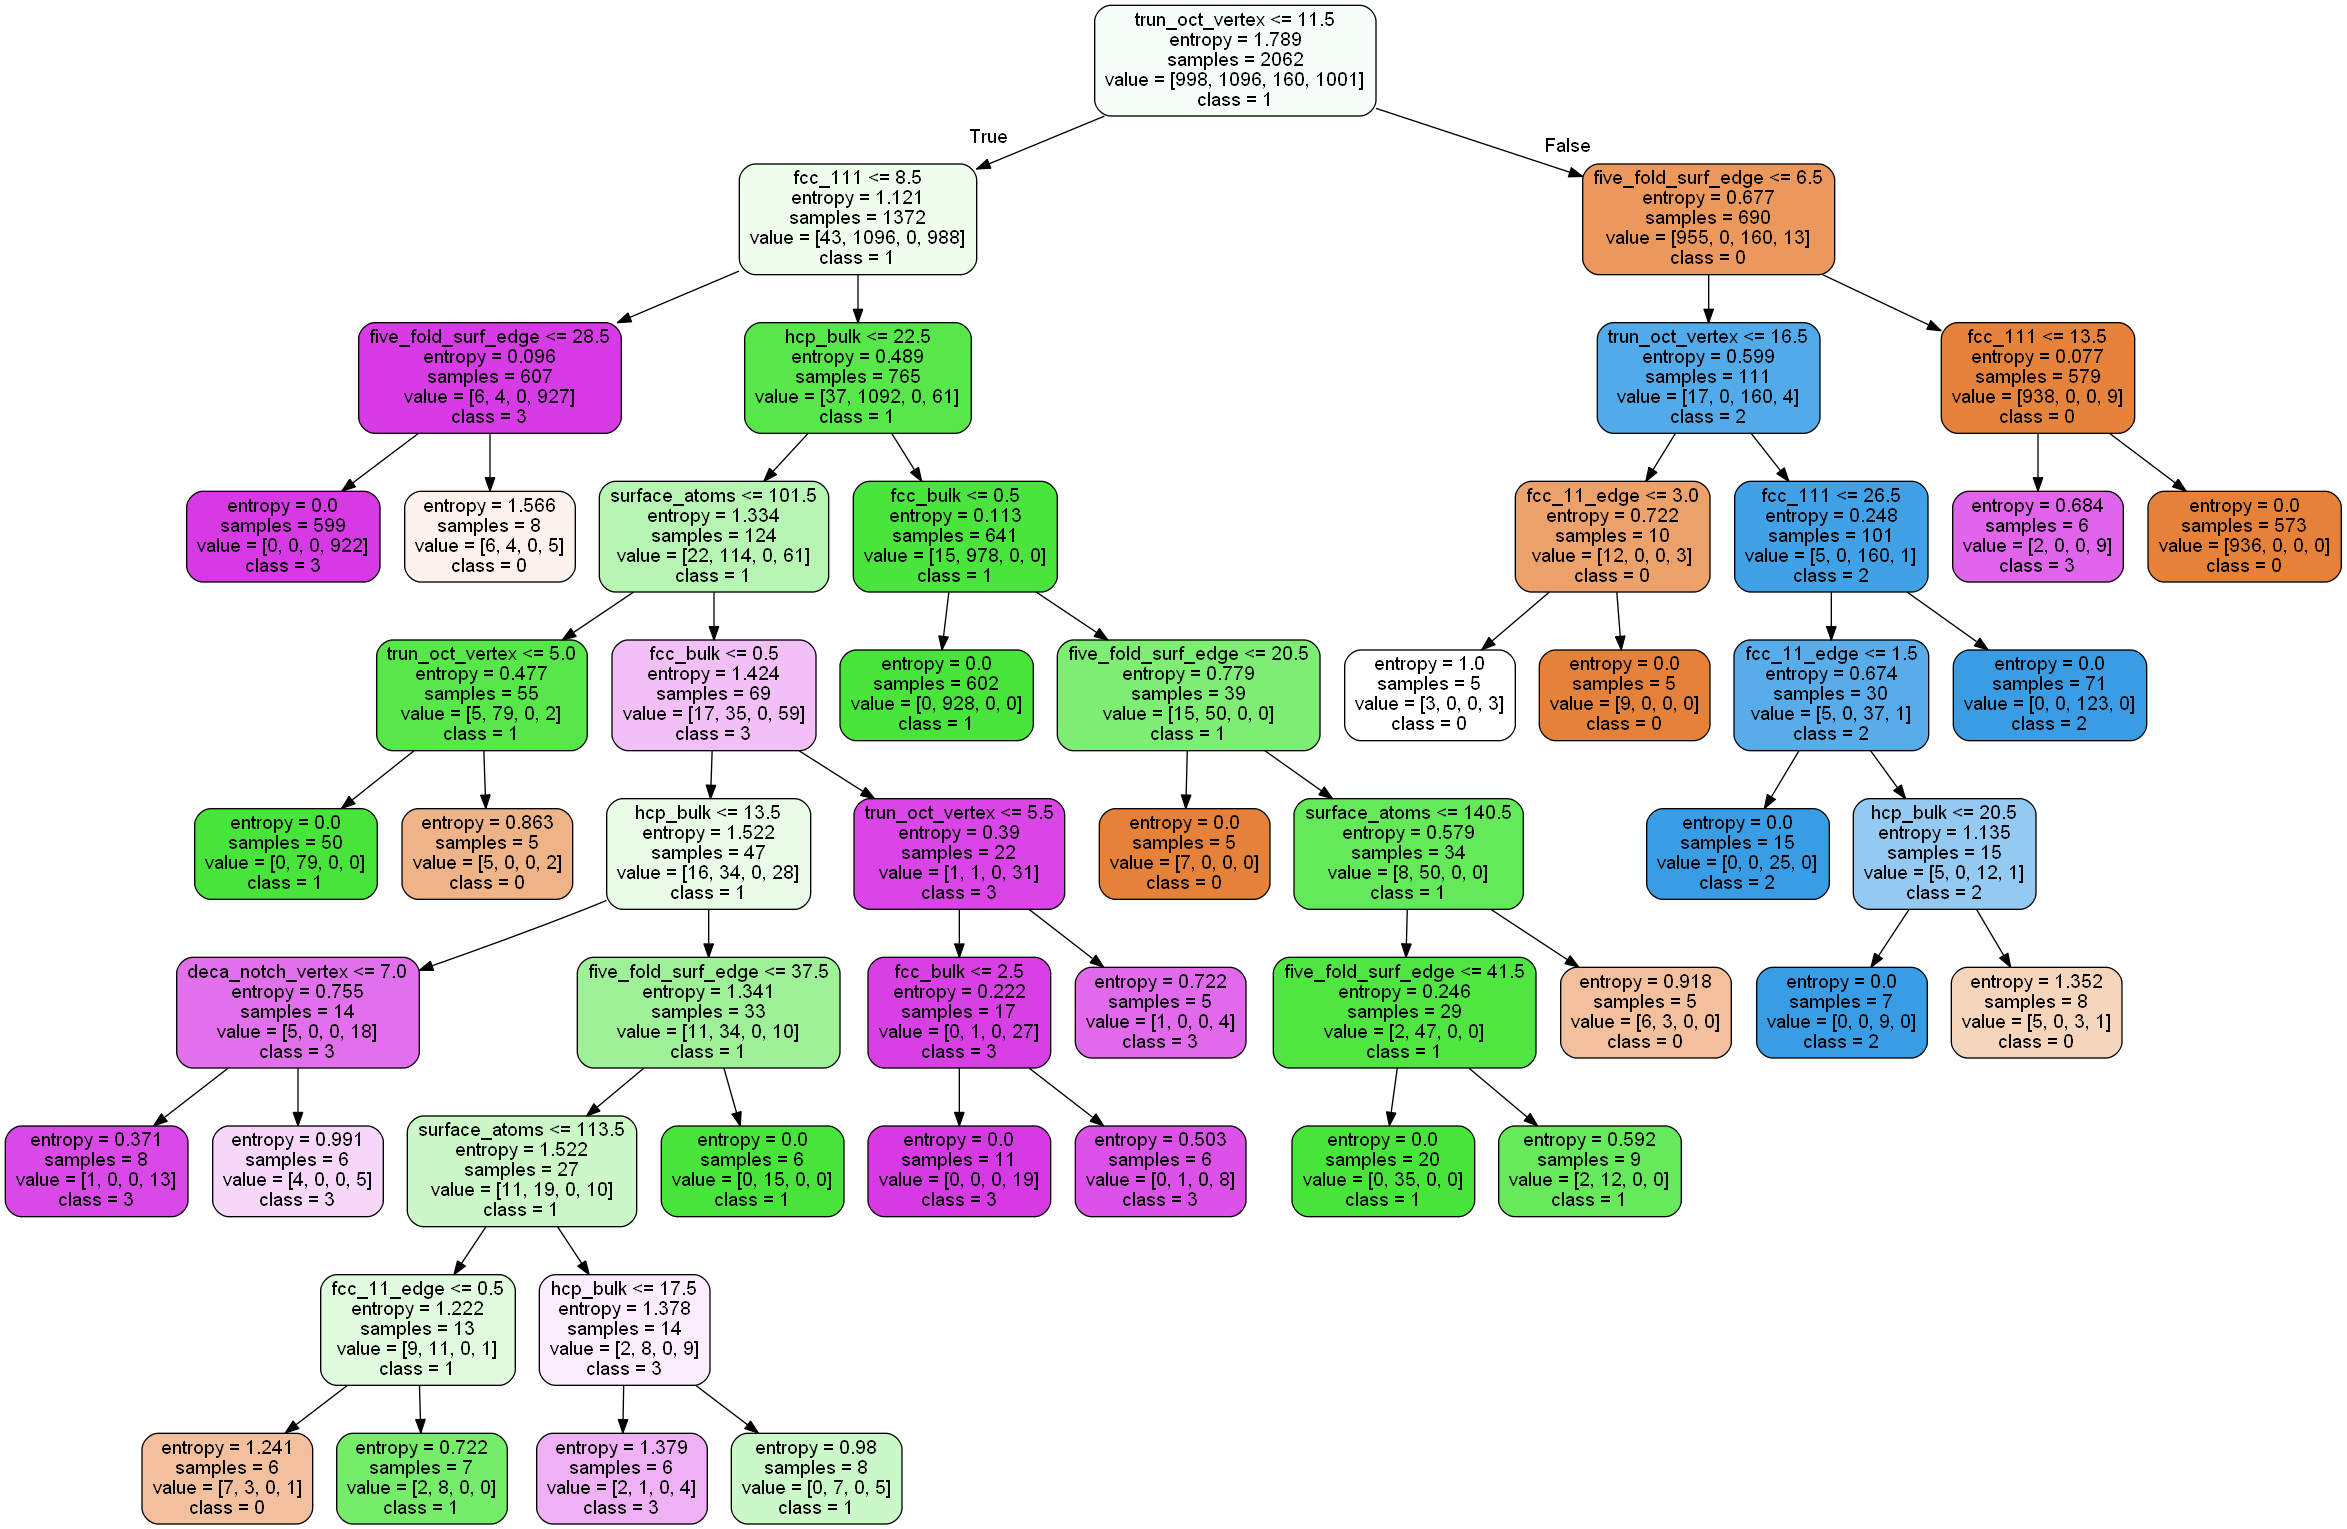

In [50]:
# Visualize one decision tree in the random forest
from sklearn.tree import export_graphviz
estimator = rf.estimators_[0]

from graphviz import Source

graph = Source(export_graphviz(estimator, out_file=None, 
                feature_names = features,
                class_names = ["0", "1", "2", "3"],
                rounded = True, proportion = False, 
                precision = 3, filled = True))

png_bytes = graph.pipe(format = "png")

with open("./figs/rf_visualization.png","wb") as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

# import graphviz

# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)
# # in console: dot -Tpng tree.dot -o tree.png    (PNG format)

### Feature Importance

               features  importance
1              fcc_bulk    0.284284
2              hcp_bulk    0.262433
7           fcc_10_edge    0.144606
6   five_fold_surf_edge    0.090954
12      trun_oct_vertex    0.075904
4               fcc_111    0.071712
14        surface_atoms    0.031071
10      ico_surf_vertex    0.029926
3            deca_notch    0.003992
9     deca_notch_vertex    0.002585
8           fcc_11_edge    0.001920
0               n_atoms    0.000372
5               fcc_100    0.000147
13          cubo_corner    0.000096
11           tetra_edge    0.000000


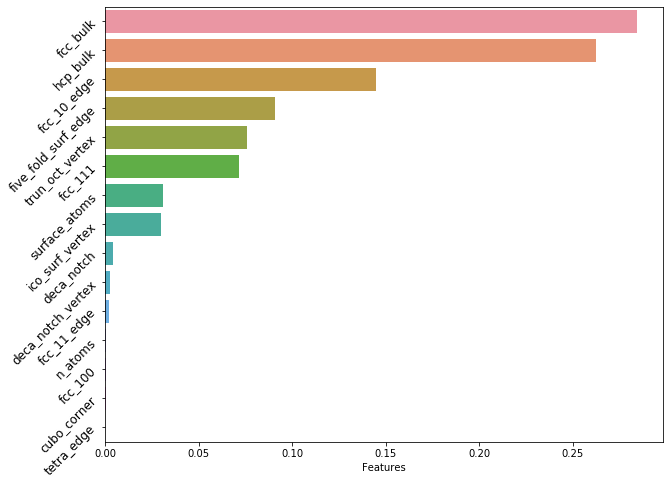

In [28]:
# Visualize feature importances
feat_imp = pd.DataFrame(data = {"features": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)

print(feat_imp)

from pylab import rcParams
rcParams["figure.figsize"] = 10, 8

sns.barplot(feat_imp["importance"], feat_imp["features"])
plt.xlabel("Features")
plt.ylabel(None)
plt.yticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("./figs/RF_feature_imp.png", dpi = 300, bbox_inches = "tight")

plt.show()

### Confusion Matrix

Confusion matrix without normalization
[[428   8   1   2]
 [  2 450   0   0]
 [  2   0  72   0]
 [  1   3   0 426]]


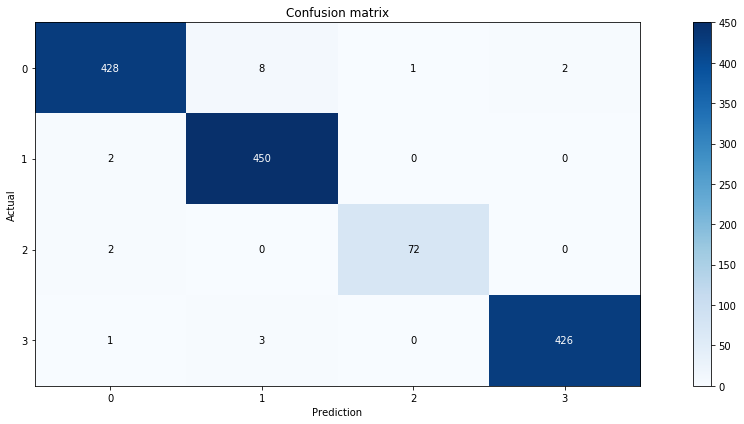

Normalized confusion matrix
[[0.97494305 0.01822323 0.0022779  0.00455581]
 [0.00442478 0.99557522 0.         0.        ]
 [0.02702703 0.         0.97297297 0.        ]
 [0.00232558 0.00697674 0.         0.99069767]]


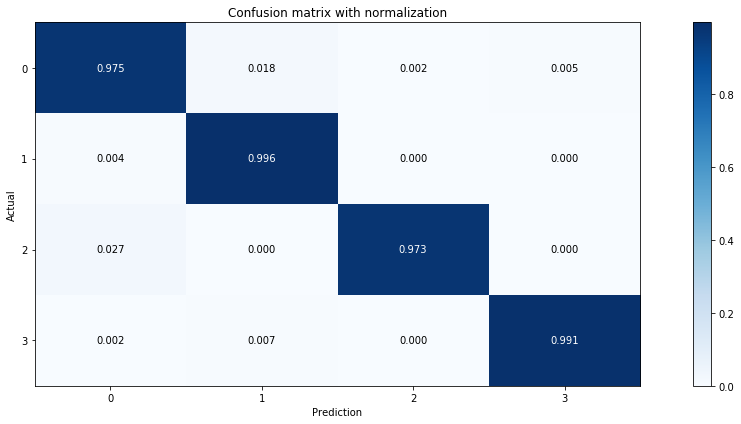

Great improvement on the prediction of label 2


In [29]:
plot_cm(test_y, pred_test_rf, labels = ["0", "1", "2", "3"], normalize = False)
plt.savefig("./figs/cm_rf_unnorm.png", dpi = 300)

plt.show()

plot_cm(test_y, pred_test_rf, labels = ["0", "1", "2", "3"], normalize = True)
plt.savefig("./figs/cm_rf_norm.png", dpi = 300)

plt.show()

print("Great improvement on the prediction of label 2")

### Re-test with Selected Features

In [30]:
# Remove the least important features with importance less than 1% and re-test
features_rf = features.copy()
features_rf.remove("tetra_edge")
features_rf.remove("cubo_corner")
features_rf.remove("fcc_100")
features_rf.remove("n_atoms")
features_rf.remove("fcc_11_edge")
features_rf.remove("deca_notch_vertex")
features_rf.remove("deca_notch")

print(features_rf)

['fcc_bulk', 'hcp_bulk', 'fcc_111', 'five_fold_surf_edge', 'fcc_10_edge', 'ico_surf_vertex', 'trun_oct_vertex', 'surface_atoms']


In [31]:
rf2 = RandomForestClassifier(n_estimators=10, criterion = "entropy", max_depth = 10, min_samples_split = 5, min_samples_leaf = 5, 
                            max_features = None, bootstrap=True, random_state=3)

rf2.fit(train_x[features_rf], train_y)

pred_test_rf2 = rf2.predict(test_x[features_rf])
pred_train_rf2 = rf2.predict(train_x[features_rf])

print(accuracy_score(test_y, pred_test_rf2))
print(accuracy_score(train_y, pred_train_rf2))

0.9827956989247312
0.9877112135176651


## Apply the Desicion Tree Method

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "entropy", random_state=3, max_depth = 9, min_samples_split = 5, min_samples_leaf = 5)

dt.fit(train_x, train_y)

pred_test_dt = dt.predict(test_x)
pred_train_dt = dt.predict(train_x)

print(accuracy_score(test_y, pred_test_dt))
print(accuracy_score(train_y, pred_train_dt))

0.978494623655914
0.9880184331797235


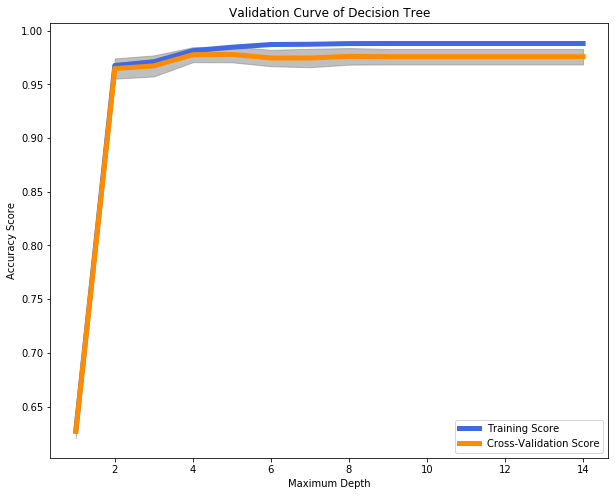

In [33]:
val_range = np.arange(1, 15, 1)

train_rf_scores, test_rf_scores = validation_curve(DecisionTreeClassifier(criterion = "entropy",
                                                                          min_samples_split = 5,
                                                                          min_samples_leaf = 5,
                                                                          random_state=3), 
                                                   train_x, train_y, 
                                                   param_name = "max_depth", 
                                                   param_range = val_range,
                                                   cv = 10, 
                                                   scoring = "accuracy",
                                                   n_jobs = -1)

train_rf_mean = np.mean(train_rf_scores, axis = 1)
test_rf_mean = np.mean(test_rf_scores, axis = 1)

train_rf_std = np.std(train_rf_scores, axis=1)
test_rf_std = np.std(test_rf_scores, axis=1)

from pylab import rcParams
rcParams["figure.figsize"] = 10, 8

plt.plot(val_range, train_rf_mean, label = "Training Score", color = "royalblue", lw = 5)
plt.plot(val_range, test_rf_mean, label = "Cross-Validation Score", color = "darkorange", lw = 5)

# Plot accurancy bands for training and test sets
plt.fill_between(val_range, train_rf_mean - train_rf_std, train_rf_mean + train_rf_std, color = "gray", alpha = 0.5)
plt.fill_between(val_range, test_rf_mean - test_rf_std, test_rf_mean + test_rf_std, color = "gray", alpha = 0.5)

# Create plot
plt.title("Validation Curve of Decision Tree")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy Score")
plt.legend(loc = "lower right")
plt.savefig("./figs/val_cur_dt_depth.png", dpi = 300)

plt.show()

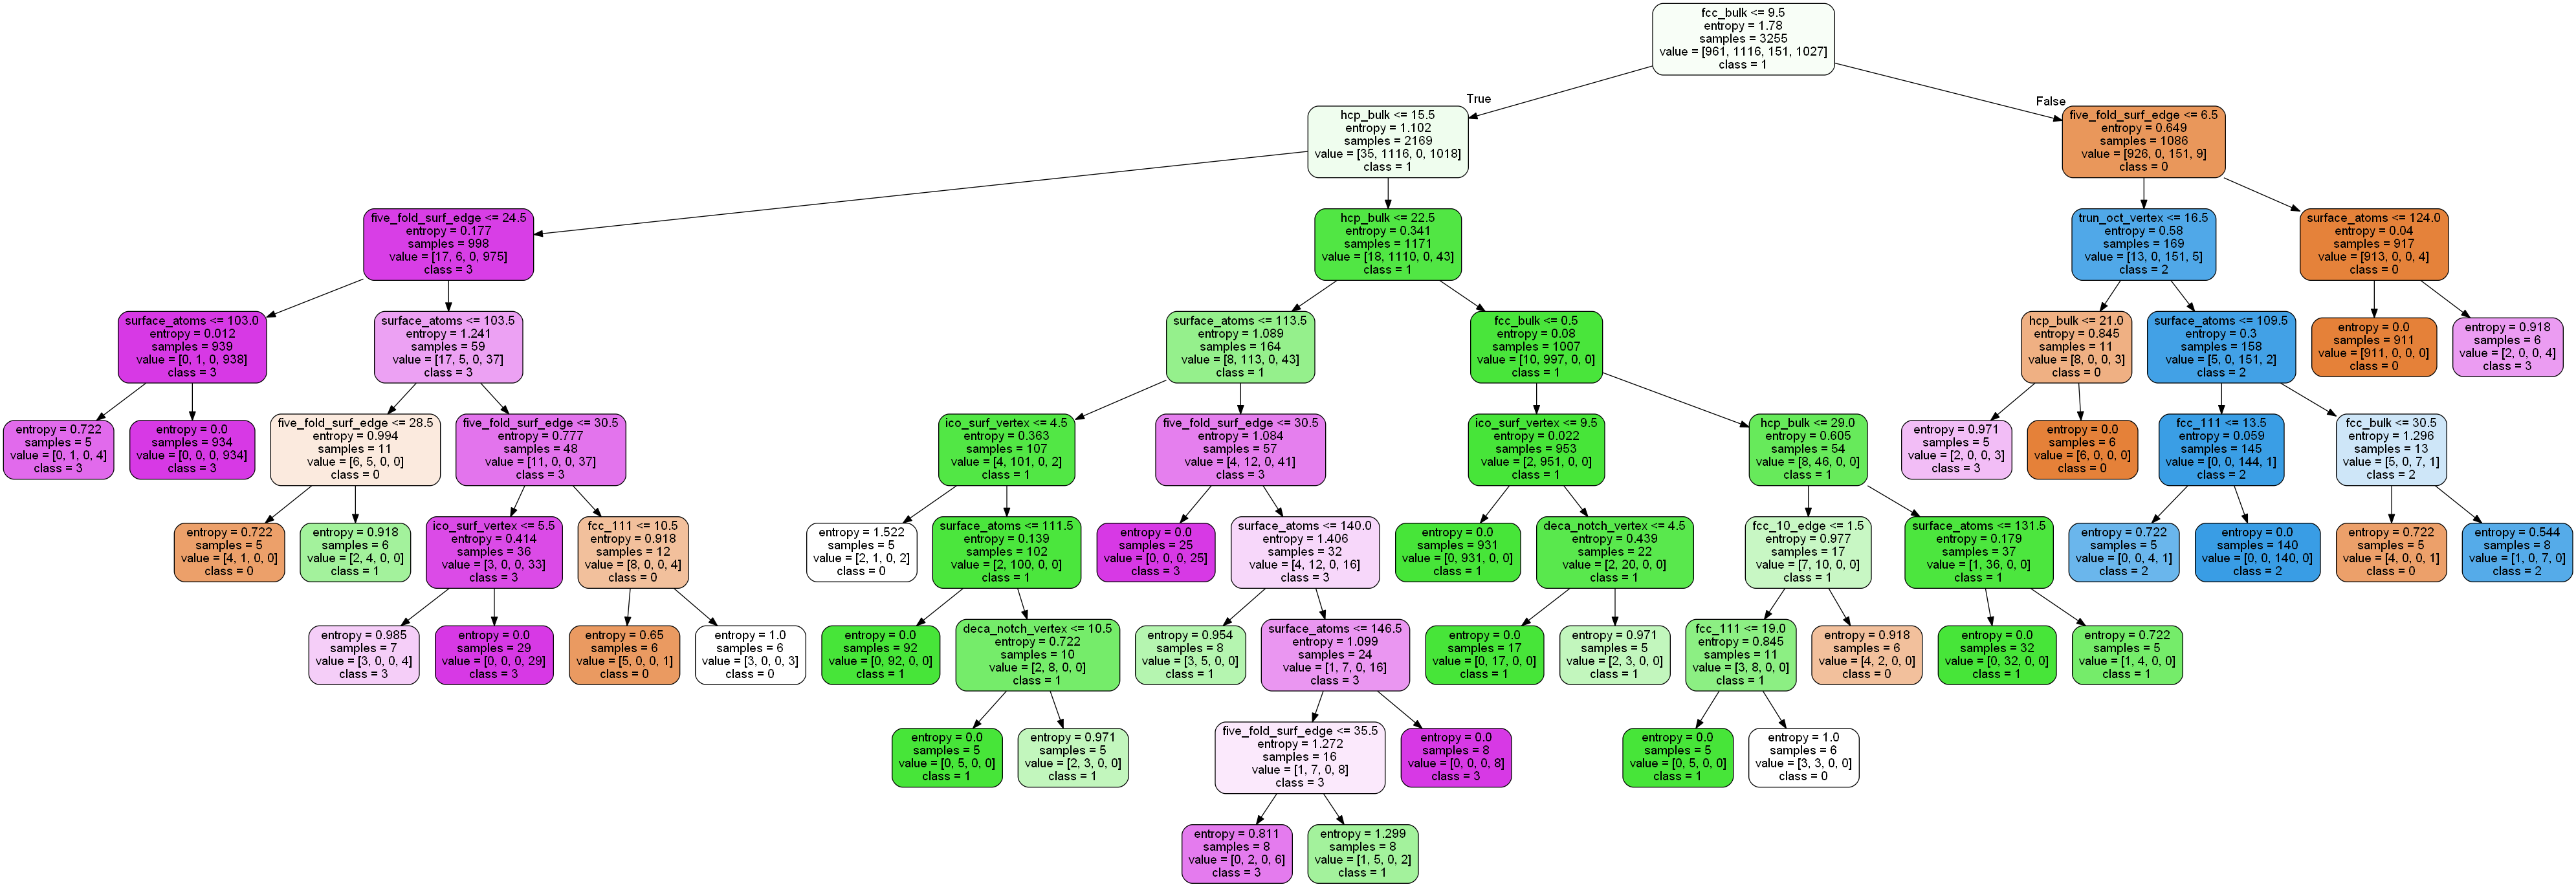

In [51]:
graph_dt = Source(export_graphviz(dt, out_file=None, 
                feature_names = features,
                class_names = ["0", "1", "2", "3"],
                rounded = True, proportion = False, 
                precision = 3, filled = True))

png_bytes_dt = graph_dt.pipe(format = "png")

with open("./figs/dt_visualization.png","wb") as f:
    f.write(png_bytes_dt)

from IPython.display import Image
Image(png_bytes_dt)

               features  importance
1              fcc_bulk    0.481166
2              hcp_bulk    0.345958
6   five_fold_surf_edge    0.122378
14        surface_atoms    0.033643
12      trun_oct_vertex    0.007274
10      ico_surf_vertex    0.006342
4               fcc_111    0.001658
9     deca_notch_vertex    0.001263
7           fcc_10_edge    0.000318
0               n_atoms    0.000000
3            deca_notch    0.000000
5               fcc_100    0.000000
8           fcc_11_edge    0.000000
11           tetra_edge    0.000000
13          cubo_corner    0.000000


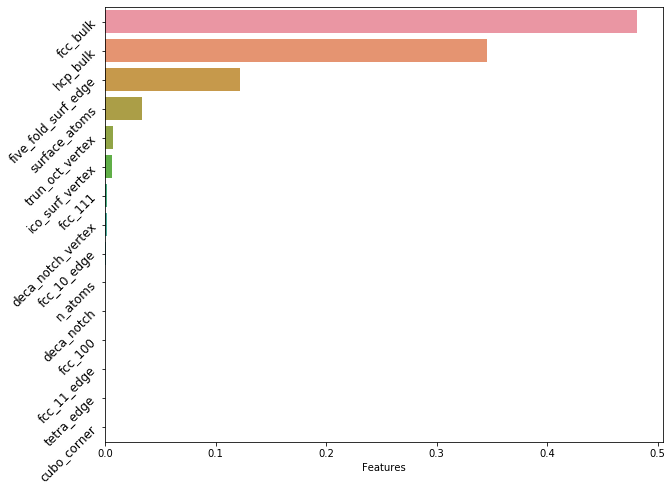

In [35]:
feat_imp = pd.DataFrame(data = {"features": features, "importance": dt.feature_importances_}).sort_values("importance", ascending = False)

print(feat_imp)

from pylab import rcParams
rcParams["figure.figsize"] = 10, 8

sns.barplot(feat_imp["importance"], feat_imp["features"])
plt.xlabel("Features")
plt.ylabel(None)
plt.yticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("./figs/DT_feature_imp.png", dpi = 300, bbox_inches = "tight")

plt.show()

Confusion matrix without normalization
[[425  10   0   4]
 [  3 447   0   2]
 [  2   0  72   0]
 [  5   4   0 421]]


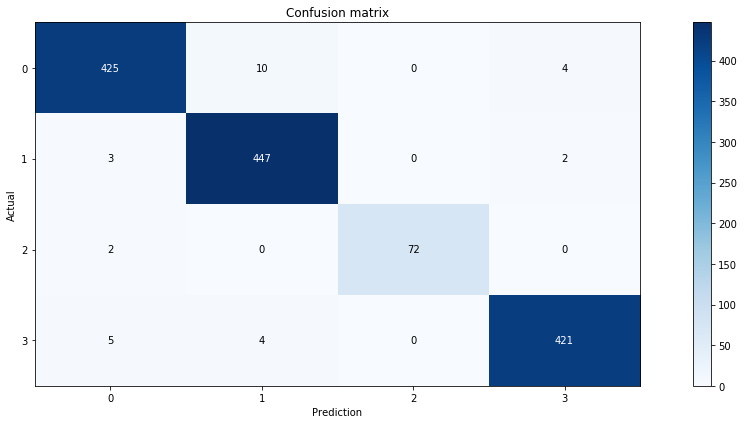

Normalized confusion matrix
[[0.96810934 0.02277904 0.         0.00911162]
 [0.00663717 0.98893805 0.         0.00442478]
 [0.02702703 0.         0.97297297 0.        ]
 [0.01162791 0.00930233 0.         0.97906977]]


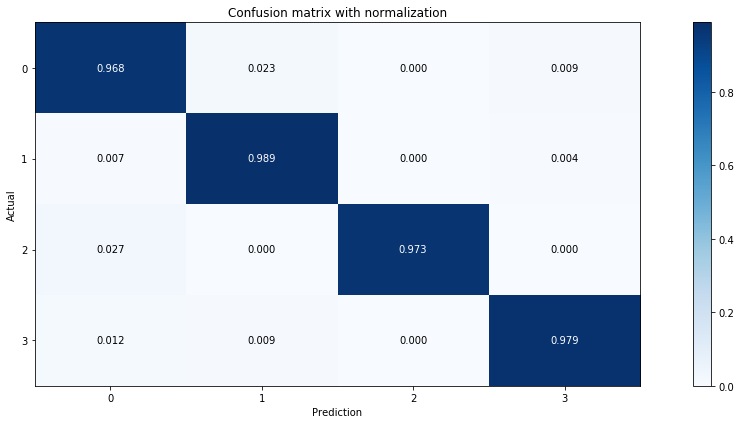

Great improvement on the prediction of label 2


In [53]:
plot_cm(test_y, pred_test_dt, labels = ["0", "1", "2", "3"], normalize = False)
plt.savefig("./figs/cm_dt_unnorm.png", dpi = 300)

plt.show()

plot_cm(test_y, pred_test_dt, labels = ["0", "1", "2", "3"], normalize = True)
plt.savefig("./figs/cm_dt_norm.png", dpi = 300)

plt.show()

print("Great improvement on the prediction of label 2")

# SVM Methods

In [37]:
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

train_2_x, test_2_x, train_2_y, test_2_y = train_test_split(data_cleaned[['fcc_bulk','hcp_bulk']].values, data_cleaned["type"].values, train_size = 0.7, random_state = 2)
train_2_x = norm.fit_transform(train_2_x)
test_2_x = norm.transform(test_2_x)

In [38]:
C = 1.0 
svc = svm.SVC(kernel='linear', C=C)   
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter = 500000)   
poly_svc = svm.SVC(kernel='poly', gamma="auto", degree=3, C=C, max_iter = 100000)  
lin_svc = svm.LinearSVC(C=C)     

lin_svc.fit(train_2_x,train_2_y)
svc.fit(train_2_x,train_2_y)
poly_svc.fit(train_2_x,train_2_y)
rbf_svc.fit(train_2_x,train_2_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=500000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
print("Accuracy:",metrics.accuracy_score(test_2_y, svc.predict(test_2_x)))
print("Accuracy:",metrics.accuracy_score(train_2_y, svc.predict(train_2_x)))
print("Accuracy:",metrics.accuracy_score(test_2_y, rbf_svc.predict(test_2_x)))
print("Accuracy:",metrics.accuracy_score(test_2_y, poly_svc.predict(test_2_x)))
print("Accuracy:",metrics.accuracy_score(test_2_y, lin_svc.predict(test_2_x)))

Accuracy: 0.9706093189964158
Accuracy: 0.9643625192012288
Accuracy: 0.9741935483870968
Accuracy: 0.9706093189964158
Accuracy: 0.9741935483870968


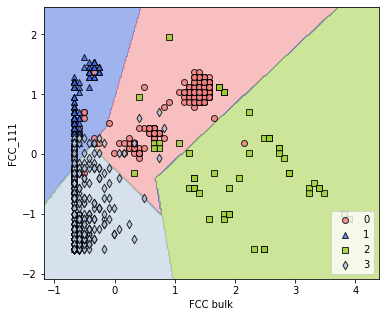

Accuracy: 0.9706093189964158


In [40]:
x_min, x_max = train_2_x[:, 0].min() - .5, train_2_x[:, 0].max() + .5
y_min, y_max = train_2_x[:, 1].min() - .5, train_2_x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

from matplotlib.colors import ListedColormap
markers = ("o", "^", "s", "d")
colors = ("lightcoral", "royalblue", "yellowgreen", "lightsteelblue")
cmap = ListedColormap(colors[:len(np.unique(train_2_y))])

from pylab import rcParams
rcParams["figure.figsize"] = 6, 5
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha = 0.5, cmap = cmap)
for index, cat in enumerate(np.unique(train_2_y)):
    plt.scatter(train_2_x[train_2_y == cat, 0], train_2_x[train_2_y== cat, 1], alpha = 0.8, c = [cmap(index)], edgecolor = 'k',  marker = markers[index], label = cat)
plt.xlabel('FCC bulk')
plt.ylabel('FCC_111')
plt.legend(loc = 'lower right')

plt.savefig("./figs/SVC_result.png", dpi = 300)
plt.show()

print("Accuracy:",metrics.accuracy_score(test_2_y, svc.predict(test_2_x)))

Confusion matrix without normalization
[[422   6   2   9]
 [  0 444   0   8]
 [  8   1  65   0]
 [  1   6   0 423]]


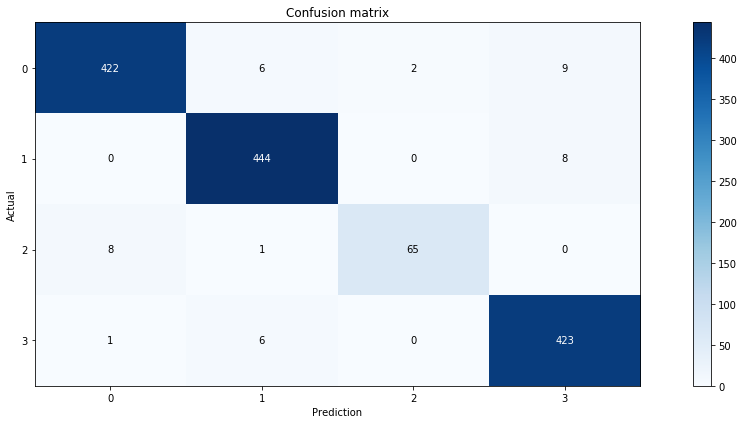

Normalized confusion matrix
[[0.96127563 0.01366743 0.00455581 0.02050114]
 [0.         0.98230088 0.         0.01769912]
 [0.10810811 0.01351351 0.87837838 0.        ]
 [0.00232558 0.01395349 0.         0.98372093]]


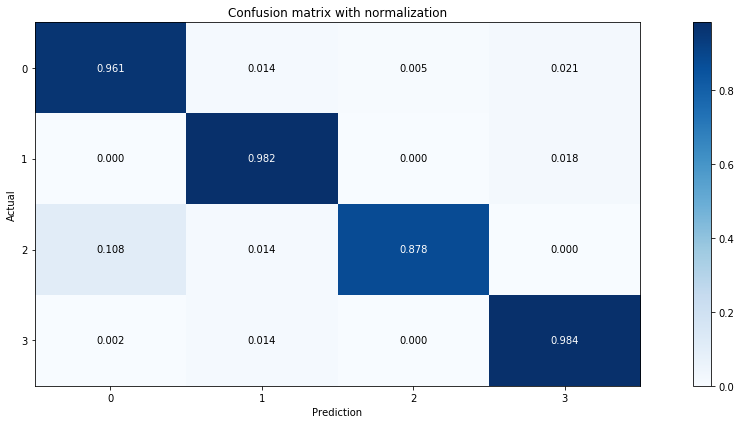

In [41]:
plot_cm(test_2_y, svc.predict(test_2_x), labels = ["0", "1", "2", "3"], normalize = False)
plt.savefig("./figs/cm_svc_unnorm.png", dpi = 300)

plt.show()

plot_cm(test_2_y, svc.predict(test_2_x), labels = ["0", "1", "2", "3"], normalize = True)
plt.savefig("./figs/cm_svc_norm.png", dpi = 300)

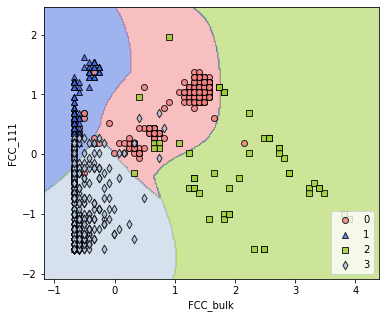

Accuracy: 0.9741935483870968


In [42]:
from pylab import rcParams
rcParams["figure.figsize"] = 6, 5
W=rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
W = W.reshape(xx.shape)
plt.contourf(xx, yy, W, alpha = 0.5, cmap = cmap)
for index, cat in enumerate(np.unique(train_2_y)):
    plt.scatter(train_2_x[train_2_y == cat, 0], train_2_x[train_2_y== cat, 1], alpha = 0.8, c = [cmap(index)], edgecolor = 'k',  marker = markers[index], label = cat)
plt.xlabel('FCC_bulk')
plt.ylabel('FCC_111')
plt.legend(loc = 'lower right')

plt.savefig("./figs/rbfSVC_result.png", dpi = 300)
plt.show()

print("Accuracy:",metrics.accuracy_score(test_2_y, rbf_svc.predict(test_2_x)))

Confusion matrix without normalization
[[422   6   2   9]
 [  0 444   0   8]
 [  4   1  69   0]
 [  0   6   0 424]]


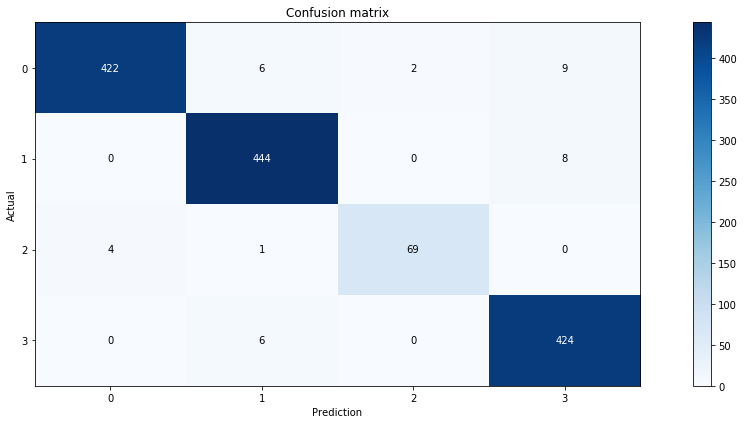

Normalized confusion matrix
[[0.96127563 0.01366743 0.00455581 0.02050114]
 [0.         0.98230088 0.         0.01769912]
 [0.05405405 0.01351351 0.93243243 0.        ]
 [0.         0.01395349 0.         0.98604651]]


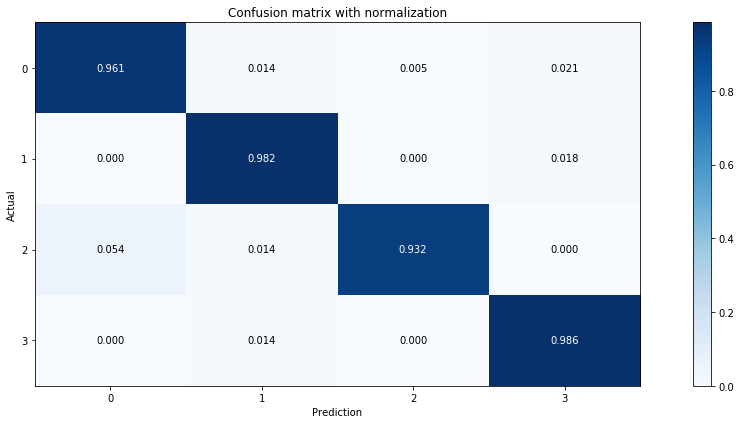

In [43]:
plot_cm(test_2_y, rbf_svc.predict(test_2_x), labels = ["0", "1", "2", "3"], normalize = False)
plt.savefig("./figs/cm_rbf_unnorm.png", dpi = 300)

plt.show()

plot_cm(test_2_y, rbf_svc.predict(test_2_x), labels = ["0", "1", "2", "3"], normalize = True)
plt.savefig("./figs/cm_rbf_norm.png", dpi = 300)

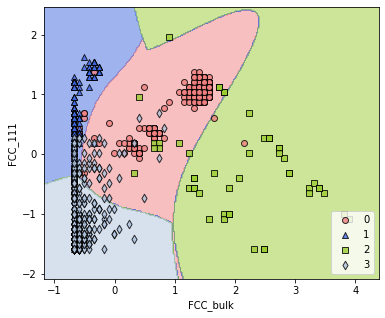

Accuracy: 0.9706093189964158


In [44]:
rcParams["figure.figsize"] = 6, 5
H=poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
H = H.reshape(xx.shape)
plt.contourf(xx, yy, H, alpha = 0.5, cmap = cmap)
for index, cat in enumerate(np.unique(train_2_y)):
    plt.scatter(train_2_x[train_2_y == cat, 0], train_2_x[train_2_y== cat, 1], alpha = 0.8, c = [cmap(index)], edgecolor = 'k',  marker = markers[index], label = cat)
plt.xlabel('FCC_bulk')
plt.ylabel('FCC_111')
plt.legend(loc = 'lower right')
plt.savefig("./figs/polySVC_result.png", dpi = 300)
plt.show()

print("Accuracy:",metrics.accuracy_score(test_2_y, poly_svc.predict(test_2_x)))

Confusion matrix without normalization
[[425   8   1   5]
 [  0 449   0   3]
 [  7   0  67   0]
 [  9   8   0 413]]


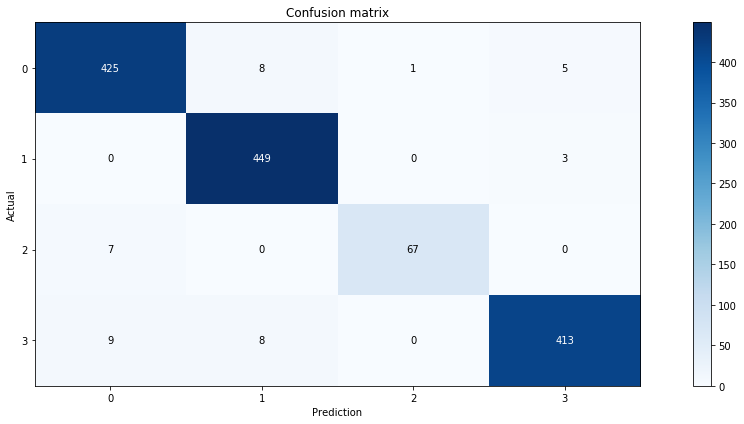

Normalized confusion matrix
[[0.96810934 0.01822323 0.0022779  0.01138952]
 [0.         0.99336283 0.         0.00663717]
 [0.09459459 0.         0.90540541 0.        ]
 [0.02093023 0.01860465 0.         0.96046512]]


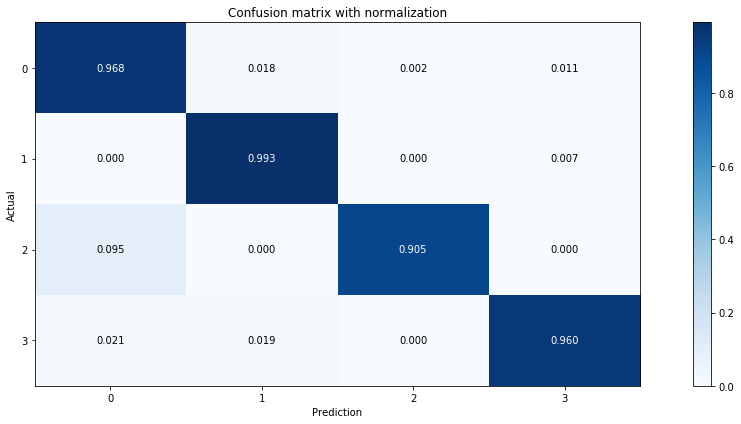

In [45]:
plot_cm(test_2_y, poly_svc.predict(test_2_x), labels = ["0", "1", "2", "3"], normalize = False)
plt.savefig("./figs/cm_poly_unnorm.png", dpi = 300)

plt.show()

plot_cm(test_2_y, poly_svc.predict(test_2_x), labels = ["0", "1", "2", "3"], normalize = True)
plt.savefig("./figs/cm_poly_norm.png", dpi = 300)

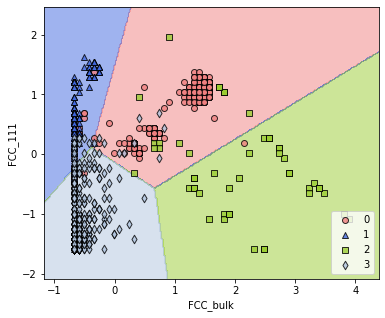

Accuracy: 0.9741935483870968


In [46]:
rcParams["figure.figsize"] = 6, 5
M=lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
M = M.reshape(xx.shape)
plt.contourf(xx, yy, M, alpha = 0.5, cmap = cmap)
for index, cat in enumerate(np.unique(train_2_y)):
    plt.scatter(train_2_x[train_2_y == cat, 0], train_2_x[train_2_y== cat, 1], alpha = 0.8, c = [cmap(index)], edgecolor = 'k',  marker = markers[index], label = cat)
plt.xlabel('FCC_bulk')
plt.ylabel('FCC_111')
plt.legend(loc = 'lower right')
plt.savefig("./figs/linSVC_result.png", dpi = 300)
plt.show()

print("Accuracy:",metrics.accuracy_score(test_2_y, lin_svc.predict(test_2_x)))

Confusion matrix without normalization
[[425   7   0   7]
 [  0 448   0   4]
 [ 10   1  63   0]
 [  0   7   0 423]]


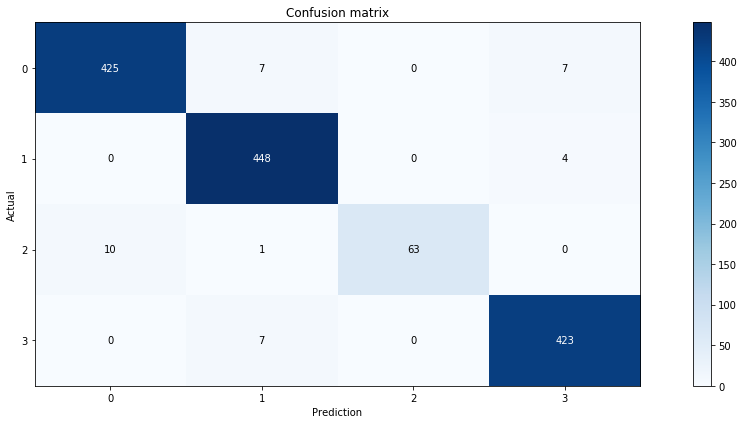

Normalized confusion matrix
[[0.96810934 0.01594533 0.         0.01594533]
 [0.         0.99115044 0.         0.00884956]
 [0.13513514 0.01351351 0.85135135 0.        ]
 [0.         0.01627907 0.         0.98372093]]


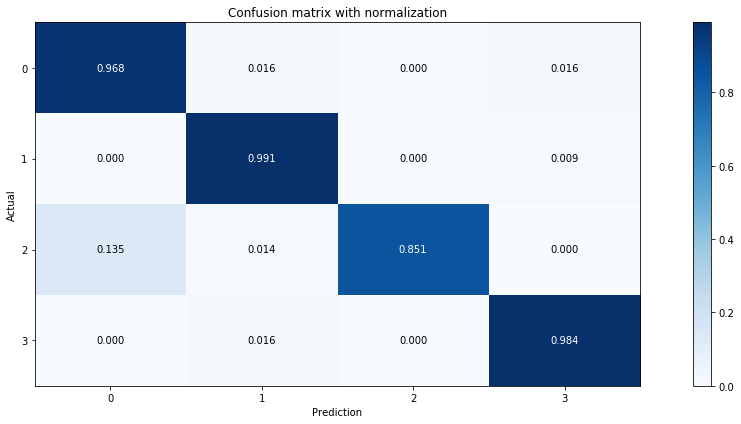

In [47]:
plot_cm(test_2_y, lin_svc.predict(test_2_x), labels = ["0", "1", "2", "3"], normalize = False)
plt.savefig("./figs/cm_lin_unnorm.png", dpi = 300)

plt.show()

plot_cm(test_2_y, lin_svc.predict(test_2_x), labels = ["0", "1", "2", "3"], normalize = True)
plt.savefig("./figs/cm_lin_norm.png", dpi = 300)

# Cross-Validation Results with Different Methods

In [48]:
from sklearn.model_selection import cross_val_score

x_rfe = data_cleaned[features_rfe]
x_pca = pca.fit_transform(x_rfe)

svm_norm = norm.fit_transform(data_cleaned[["fcc_bulk", "hcp_bulk"]])

lr_cv_score = cross_val_score(ovr_lr, x_pca, data_cleaned["type"], cv = 20, scoring="accuracy")

rf_cv_score = cross_val_score(rf, data_cleaned[features], data_cleaned["type"], cv = 20, scoring="accuracy")

dt_cv_score = cross_val_score(dt, data_cleaned[features], data_cleaned["type"], cv = 20, scoring="accuracy")

svm_cv_score = cross_val_score(svc, svm_norm, data_cleaned["type"], cv = 20, scoring="accuracy")

rbf_svc_cv_score = cross_val_score(rbf_svc, svm_norm, data_cleaned["type"], cv = 20, scoring="accuracy")

lin_svc_cv_score = cross_val_score(lin_svc, svm_norm, data_cleaned["type"], cv = 20, scoring="accuracy")

poly_svc_cv_score = cross_val_score(poly_svc, svm_norm, data_cleaned["type"], cv = 20, scoring="accuracy")

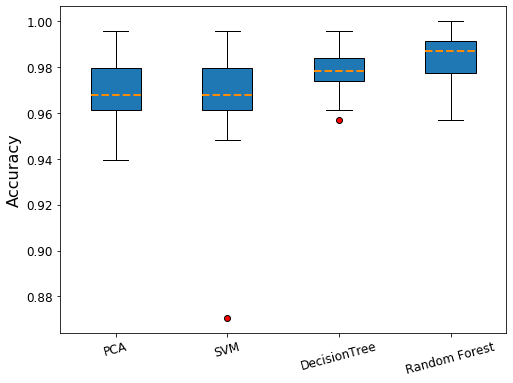

In [49]:
cv_score = pd.DataFrame(data = {"PCA": lr_cv_score, "SVM":svm_cv_score, "DecisionTree":dt_cv_score, "RandomForest":rf_cv_score})

means = [lr_cv_score.mean(),svm_cv_score.mean(), dt_cv_score.mean(), rf_cv_score.mean()]
stds = [lr_cv_score.std(), svm_cv_score.std(), dt_cv_score.std(), rf_cv_score.std()]

heads = ["PCA", "SVM", "DecisionTree", "Random Forest"]
rcParams["figure.figsize"] = 8, 6

outliers = dict(markerfacecolor = "r", marker = "o")
medianprops = dict(linestyle = "--", linewidth = 2, color = "darkorange")

plt.boxplot([lr_cv_score, svm_cv_score, dt_cv_score, rf_cv_score], flierprops = outliers,
            patch_artist=True, vert=True, medianprops = medianprops)

plt.xticks([1, 2, 3, 4], heads, rotation = 15, ha = "center", fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy", fontsize = 16)
plt.savefig("./figs/cv_boxplot.png", dpi = 300)

plt.show()